### **Problem Statement:**

Geely Auto, a prominent Chinese automobile manufacturer, plans to expand its market presence by establishing a manufacturing unit in the United States. To successfully compete with established US and European automotive brands, Geely Auto requires a comprehensive understanding of the factors influencing car pricing in the American market. Given that pricing dynamics may differ significantly from the Chinese market, the company seeks to identify the key variables that impact the pricing of cars in the US.

The consulting firm has been contracted to analyze a large dataset of various car models sold in the US market, with a focus on understanding the factors driving car prices. The company seeks to answer the following questions:

- Which independent variables are statistically significant in predicting car prices?
- How well do these variables explain variations in car prices?

### **Business Goal:**

The objective of this analysis is to develop a predictive model for car prices using the available independent variables. This model will serve as a strategic tool for Geely Auto's management, enabling them to understand how car prices are influenced by various factors in the US market. The insights derived from the model will inform decisions related to car design, pricing strategy, and market positioning, providing a foundation for achieving competitive pricing in the new market.

#### Importing Necessary Libraries

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, r2_score

#### Read and Analyze the data

In [248]:
car_data = pd.read_csv("CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [249]:
car_data.shape

(205, 26)

In [250]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [251]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [252]:
#Splitting company name from CarName column
CompanyName = car_data['CarName'].apply(lambda x : x.split(' ')[0])
car_data.insert(3,"CompanyName",CompanyName)
car_data.drop(['CarName'],axis=1,inplace=True)
car_data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [253]:
car_data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Correcting the spelling of Company Names

| Previous Name  | Current Name  |
|---------------|--------------|
| maxda        | mazda        |
| porcshce     | porsche      |
| toyouta      | toyota       |
| vokswagen    | volkswagen   |
| vw           | volkswagen   |

These corrections ensure consistency and accuracy in naming.


In [254]:
car_data['CompanyName'] = car_data['CompanyName'].str.lower()

def replace_name(a, b):
    car_data['CompanyName'] = car_data['CompanyName'].replace(a, b)

replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

car_data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [255]:
car_data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


`car_ID` is not a valuable feature to predict the price of a car. Therefore it has been removed.

In [256]:
car_data = car_data.drop("car_ID", axis = 1)

In the dataset both numerical and categorical data are present. For the ease of analyzation the numerical and categorical data has been separated and analyed differently.

In [257]:
numerical_car_data = car_data.select_dtypes(include=["int64", "float64"])
categorical_car_data = car_data.select_dtypes(include="object")
print(numerical_car_data)
print(categorical_car_data)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68            

In [258]:
numerical_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


There are 15 numerical data in which `symboling` might be a redundant feature.

In [259]:
categorical_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CompanyName     205 non-null    object
 1   fueltype        205 non-null    object
 2   aspiration      205 non-null    object
 3   doornumber      205 non-null    object
 4   carbody         205 non-null    object
 5   drivewheel      205 non-null    object
 6   enginelocation  205 non-null    object
 7   enginetype      205 non-null    object
 8   cylindernumber  205 non-null    object
 9   fuelsystem      205 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


Threre are total 10 categorical data. We need to encode them into numerical data to feed into the model.

#### Correlation between the numerical features

In [260]:
price_correlation = numerical_car_data.corrwith(numerical_car_data["price"]).sort_values(ascending=False)
print(price_correlation)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
dtype: float64


## Correlation Between Features and Price

Above is the correlation of various car features with price:

### Strong Positive Correlation
- **Price (1.000)** – Self-correlation.
- **Engine Size (0.874)** – Larger engines are associated with higher prices.
- **Curb Weight (0.835)** – Heavier cars tend to be more expensive.
- **Horsepower (0.808)** – More powerful cars generally cost more.
- **Car Width (0.759)** – Wider cars tend to have a higher price.
- **Car Length (0.683)** – Longer cars show a moderate positive correlation with price.

### Moderate to Weak Positive Correlation
- **Wheelbase (0.578)** – A longer wheelbase has a moderate correlation with price.
- **Bore Ratio (0.553)** – Larger bore size slightly influences price.
- **Car Height (0.119)** – Minimal correlation with price.
- **Stroke (0.079)** & **Compression Ratio (0.068)** – Negligible influence on price.

### Negative Correlation
- **Symboling (-0.080)** – Slight negative correlation with price.
- **Peak RPM (-0.085)** – Higher peak RPM slightly decreases price.
- **City MPG (-0.686)** & **Highway MPG (-0.698)** – Higher fuel efficiency is associated with lower prices.

### Conclusion
**Larger and more powerful cars tend to be more expensive, while fuel-efficient vehicles are generally cheaper.**


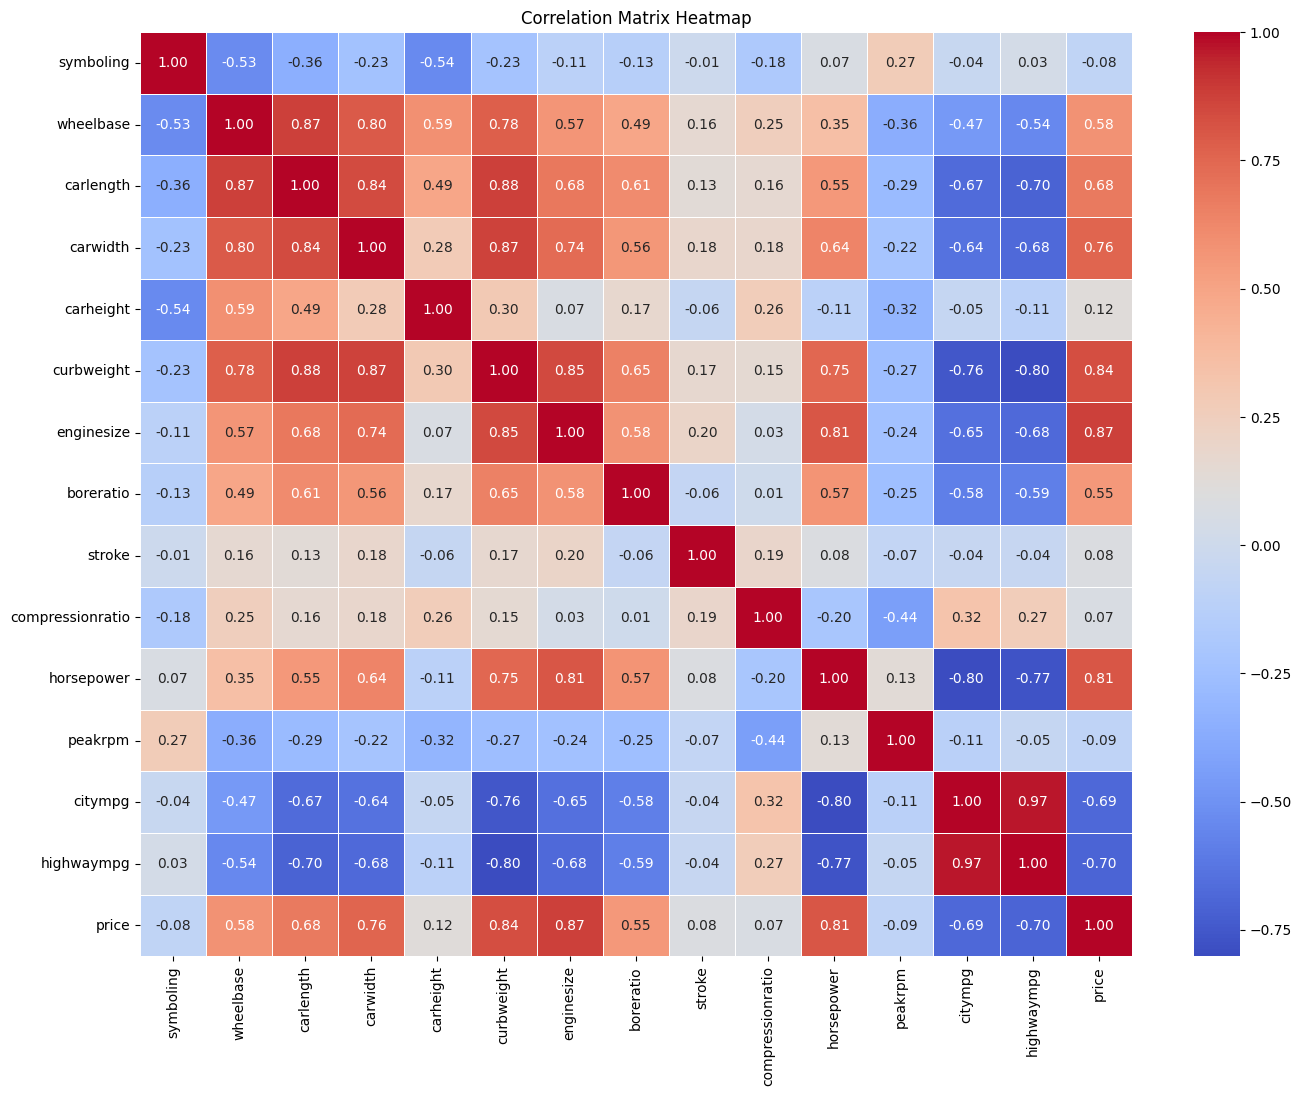

In [261]:
corr_mat = numerical_car_data.corr()

# Heatmap visualization
plt.figure(figsize=(16, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Removing Weakly Correlated Features

### Purpose
To improve model performance, features with weak correlation to price (between -0.1 and 0.1) are removed. These features contribute minimal predictive power and may introduce unnecessary noise.

### Methodology
- Identify features with weak correlation:
  ```python
  low_corr_features = price_correlation[(price_correlation > -0.1) & (price_correlation < 0.1)].index
  ```
- Drop these features from the dataset:
  ```python
  car_data = car_data.drop(low_corr_features, axis=1)
  numerical_car_data = numerical_car_data.drop(low_corr_features, axis=1)
  ```

### Impact
- **Reduced dimensionality** for improved efficiency.
- **Eliminated irrelevant features** that do not significantly influence price prediction.
- **Enhanced model interpretability** by focusing on meaningful features.

In [262]:
# Identify features with weak correlation (between -0.1 and 0.1)
low_corr_features = price_correlation[(price_correlation > -0.2) & (price_correlation < 0.2)].index

# Drop those features
car_data = car_data.drop(low_corr_features, axis=1)
numerical_car_data = numerical_car_data.drop(low_corr_features, axis=1)

In [263]:
numerical_car_data.corrwith(numerical_car_data["price"]).sort_values(ascending=False)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
citympg      -0.685751
highwaympg   -0.697599
dtype: float64

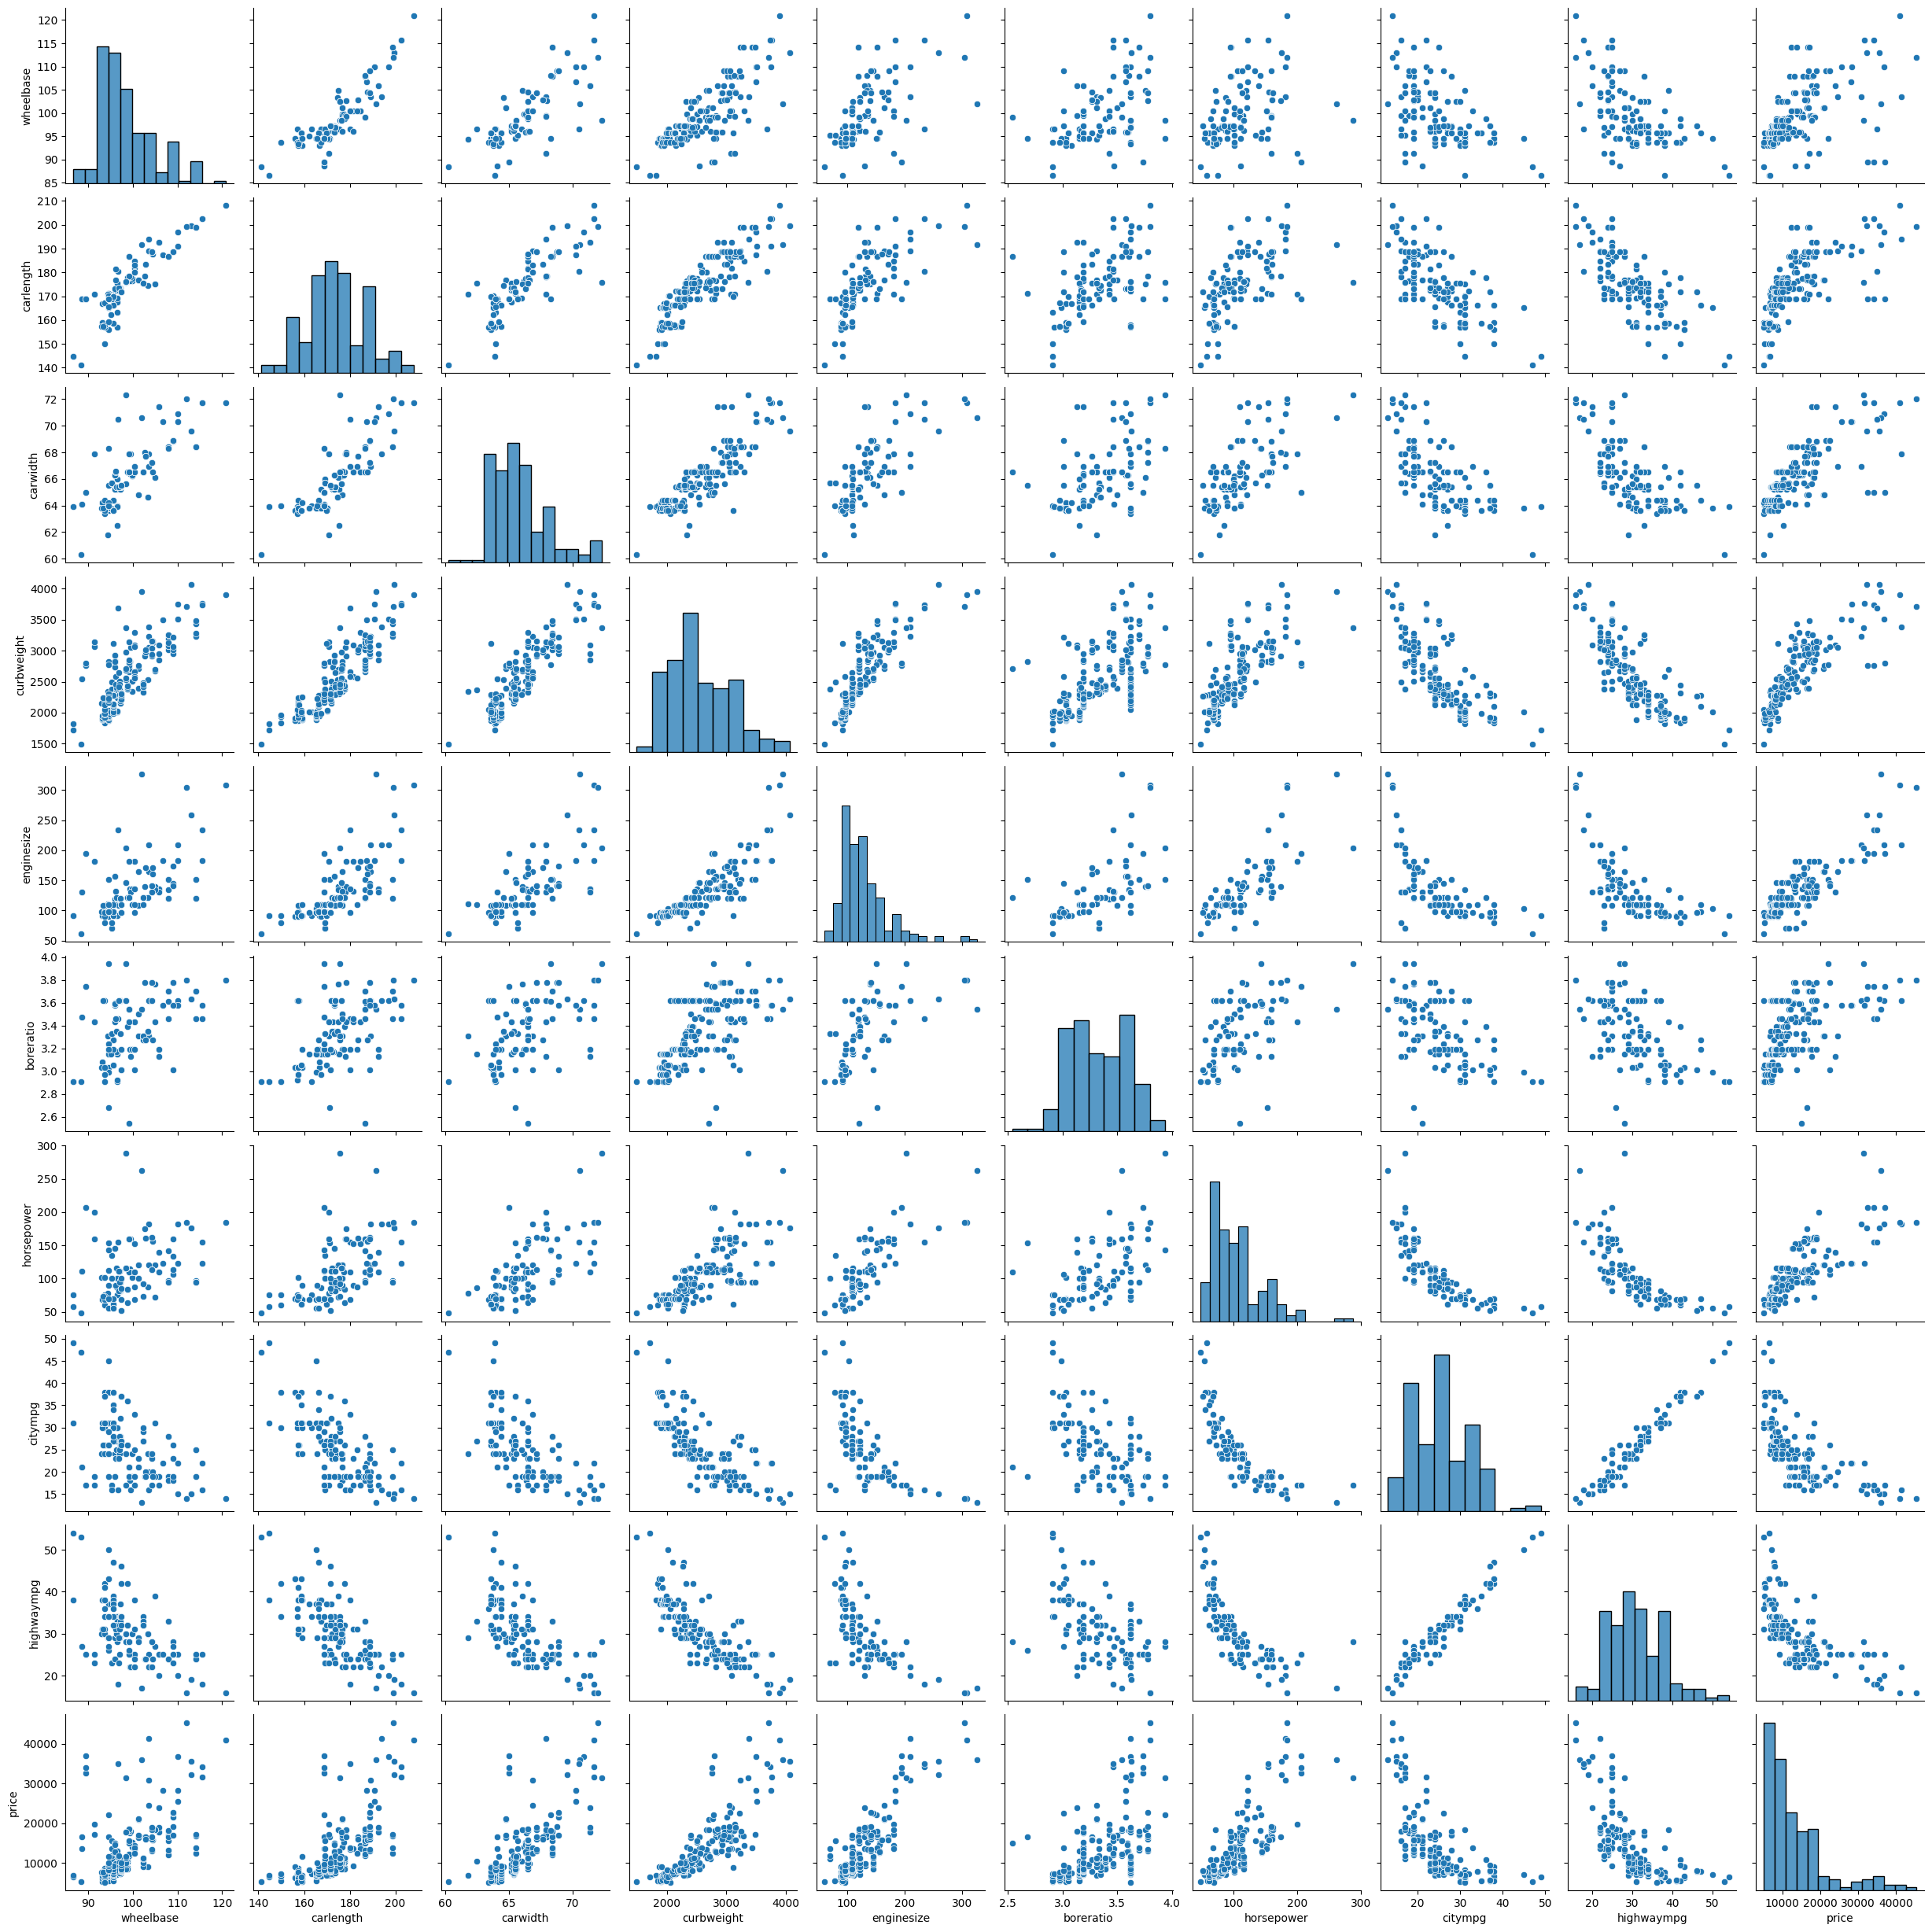

In [264]:
sns.pairplot(numerical_car_data)
plt.show()

The linear relationship between price and other features is clearly visible.

#### Analyzing the categorical data

In [265]:
car_data.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


In [266]:
categorical_car_data.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


Car price is added to the categorical data for further analyzation with respect to price.

In [267]:
categorical_car_data["price"] = car_data["price"]
categorical_car_data.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


#### Company name categorical data

CompanyName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: count, dtype: int64


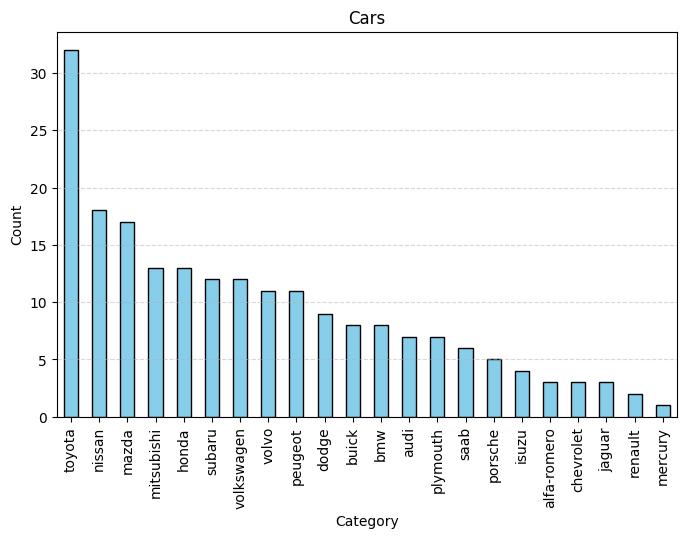

In [268]:
company_counts = categorical_car_data["CompanyName"].value_counts()
print(company_counts)

# Plotting the bar chart
plt.figure(figsize=(8, 5))
company_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cars')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

From the bar diagram it is clear that the toyota is the most favorite among all car brands.

#### Encoding of Car Brand

In [269]:
categorical_car_data["CompanyNameEncodedFreq"] = categorical_car_data["CompanyName"].map(company_counts)
categorical_car_data.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price,CompanyNameEncodedFreq
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0,3
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0,3
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0,3
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0,7
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0,7


-0.3365111910816703


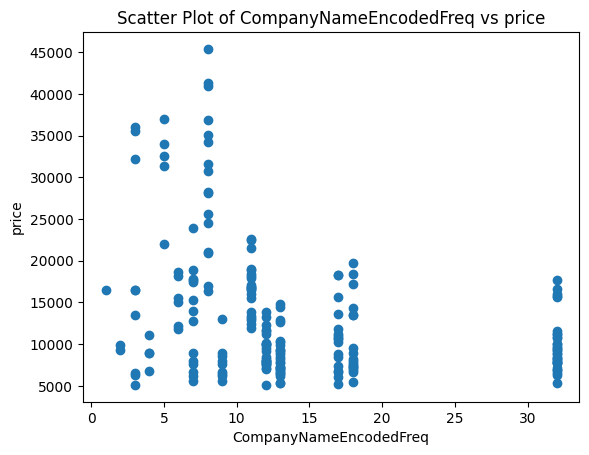

In [270]:
correlation_company_name = categorical_car_data["CompanyNameEncodedFreq"].corr(categorical_car_data["price"])
print(correlation_company_name)

# Scatter plot of Feature1 vs Feature2
plt.scatter(categorical_car_data['CompanyNameEncodedFreq'], categorical_car_data['price'])

# Adding labels to the plot
plt.xlabel('CompanyNameEncodedFreq')
plt.ylabel('price')
plt.title('Scatter Plot of CompanyNameEncodedFreq vs price')

# Show the plot
plt.show()

The **Car Brand** column in the dataset is encoded using **frequency encoding**. This technique involves replacing each brand name with the frequency of its occurrence in the dataset. The new **Frequency** column represents the count of how many times each brand appears in the dataset.

The correlation is -0.33 which is low negative correlation.

#### Target Encoding

In [271]:
# Number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a new column for the encoded values
categorical_car_data["CompanyNameEncoded"] = 0.0

# Apply K-Fold Target Encoding
for train_idx, val_idx in kf.split(categorical_car_data):
    train_data, val_data = categorical_car_data.iloc[train_idx], categorical_car_data.iloc[val_idx]
    mean_encoding = train_data.groupby("CompanyName")["price"].mean()
    categorical_car_data.loc[val_idx, "CompanyNameEncoded"] = val_data["CompanyName"].map(mean_encoding)

# Add the encoded column back to the main dataset
car_data["CompanyNameEncoded"] = categorical_car_data["CompanyNameEncoded"]

# Drop the original CompanyName and Frequency column
categorical_car_data = categorical_car_data.drop(columns=["CompanyName"], axis=1)
categorical_car_data = categorical_car_data.drop(columns=["CompanyNameEncodedFreq"], axis=1)
car_data = car_data.drop(columns=["CompanyName"], axis=1)

In [272]:
print(categorical_car_data.info())
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fueltype            205 non-null    object 
 1   aspiration          205 non-null    object 
 2   doornumber          205 non-null    object 
 3   carbody             205 non-null    object 
 4   drivewheel          205 non-null    object 
 5   enginelocation      205 non-null    object 
 6   enginetype          205 non-null    object 
 7   cylindernumber      205 non-null    object 
 8   fuelsystem          205 non-null    object 
 9   price               205 non-null    float64
 10  CompanyNameEncoded  204 non-null    float64
dtypes: float64(2), object(9)
memory usage: 17.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----

In [273]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full content of each column
noValueRow = car_data[car_data['CompanyNameEncoded'].isna()]
print(noValueRow)
print(noValueRow.index)
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

   fueltype aspiration doornumber    carbody drivewheel enginelocation  \
75      gas      turbo        two  hatchback        rwd          front   

    wheelbase  carlength  carwidth  curbweight enginetype cylindernumber  \
75      102.7      178.4      68.0        2910        ohc           four   

    enginesize fuelsystem  boreratio  horsepower  citympg  highwaympg  \
75         140       mpfi       3.78         175       19          24   

      price  CompanyNameEncoded  
75  16503.0                 NaN  
Index([75], dtype='int64')


There is only one NaN value. Removing the row won't effect the training that much.

In [274]:
car_data = car_data.drop(noValueRow.index, axis=0)
categorical_car_data = categorical_car_data.drop(noValueRow.index, axis=0)
print(categorical_car_data.info())
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fueltype            204 non-null    object 
 1   aspiration          204 non-null    object 
 2   doornumber          204 non-null    object 
 3   carbody             204 non-null    object 
 4   drivewheel          204 non-null    object 
 5   enginelocation      204 non-null    object 
 6   enginetype          204 non-null    object 
 7   cylindernumber      204 non-null    object 
 8   fuelsystem          204 non-null    object 
 9   price               204 non-null    float64
 10  CompanyNameEncoded  204 non-null    float64
dtypes: float64(2), object(9)
memory usage: 19.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fu

In [275]:
correlation_company_name = categorical_car_data["CompanyNameEncoded"].corr(categorical_car_data["price"])
print(correlation_company_name)

0.864125072240766


This target encoding of the car brand is highly correlated to the price. The **Frequency encoded** car brand features has been removed and the **Target encoded** feature is kept due to its high positive correlation with price.

#### Analysis of fuel data

In [276]:
print(categorical_car_data['fueltype'].value_counts())

fueltype
gas       184
diesel     20
Name: count, dtype: int64


As there are not many categories, only two, one hot encoding is used

In [277]:
fuletype_encoding = pd.get_dummies(categorical_car_data['fueltype'], prefix='fuel')
categorical_car_data = pd.concat([categorical_car_data.drop('fueltype', axis=1), fuletype_encoding], axis=1)
car_data = pd.concat([car_data.drop('fueltype', axis=1), fuletype_encoding], axis=1)
car_data.head()

,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CompanyNameEncoded,fuel_diesel,fuel_gas
0,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,...,130,mpfi,3.47,111,21,27,13495.0,16500.00000,False,True
1,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,...,130,mpfi,3.47,111,21,27,16500.0,14997.50000,False,True
2,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,...,152,mpfi,2.68,154,19,26,16500.0,16500.00000,False,True
3,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,...,109,mpfi,3.19,102,24,30,13950.0,17067.29175,False,True
4,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,...,136,mpfi,3.19,115,18,22,17450.0,17970.83340,False,True


#### Encoding fuel system

In [278]:
print(categorical_car_data['fuelsystem'].value_counts())

fuelsystem
mpfi    93
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


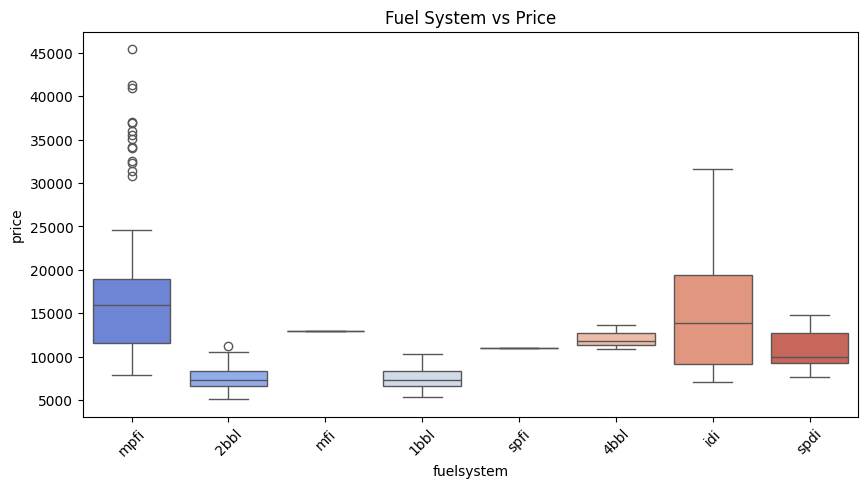

In [279]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    x='fuelsystem', 
    y='price', 
    data=categorical_car_data, 
    hue='fuelsystem',   # Assign x-variable to hue
    legend=False,       # Disable legend (since hue is same as x)
    palette='coolwarm'  # Keep color styling
)

plt.xticks(rotation=45)
plt.title("Fuel System vs Price")
plt.show()

In [280]:
print(categorical_car_data.groupby('fuelsystem')['price'].mean().sort_values(ascending=False))

fuelsystem
mpfi    17768.060935
idi     15838.150000
mfi     12964.000000
4bbl    12145.000000
spfi    11048.000000
spdi    10990.444444
1bbl     7555.545455
2bbl     7478.151515
Name: price, dtype: float64


In [281]:
fuelsystem_encoding = pd.get_dummies(categorical_car_data['fuelsystem'], prefix='fuelsystem')
categorical_car_data = pd.concat([categorical_car_data.drop('fuelsystem', axis=1), fuelsystem_encoding], axis=1)
car_data = pd.concat([car_data.drop('fuelsystem', axis=1), fuelsystem_encoding], axis=1)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aspiration          204 non-null    object 
 1   doornumber          204 non-null    object 
 2   carbody             204 non-null    object 
 3   drivewheel          204 non-null    object 
 4   enginelocation      204 non-null    object 
 5   wheelbase           204 non-null    float64
 6   carlength           204 non-null    float64
 7   carwidth            204 non-null    float64
 8   curbweight          204 non-null    int64  
 9   enginetype          204 non-null    object 
 10  cylindernumber      204 non-null    object 
 11  enginesize          204 non-null    int64  
 12  boreratio           204 non-null    float64
 13  horsepower          204 non-null    int64  
 14  citympg             204 non-null    int64  
 15  highwaympg          204 non-null    int64  
 16  price        

#### Analysing Engine type

In [282]:
print(car_data['enginetype'].value_counts())

enginetype
ohc      147
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


In [283]:
enginetype_encoding = pd.get_dummies(categorical_car_data['enginetype'], prefix='enginetype')
categorical_car_data = pd.concat([categorical_car_data.drop('enginetype', axis=1), enginetype_encoding], axis=1)
car_data = pd.concat([car_data.drop('enginetype', axis=1), enginetype_encoding], axis=1)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aspiration          204 non-null    object 
 1   doornumber          204 non-null    object 
 2   carbody             204 non-null    object 
 3   drivewheel          204 non-null    object 
 4   enginelocation      204 non-null    object 
 5   wheelbase           204 non-null    float64
 6   carlength           204 non-null    float64
 7   carwidth            204 non-null    float64
 8   curbweight          204 non-null    int64  
 9   cylindernumber      204 non-null    object 
 10  enginesize          204 non-null    int64  
 11  boreratio           204 non-null    float64
 12  horsepower          204 non-null    int64  
 13  citympg             204 non-null    int64  
 14  highwaympg          204 non-null    int64  
 15  price               204 non-null    float64
 16  CompanyNameEn

## Door number

In [284]:
print(categorical_car_data['doornumber'].value_counts())

doornumber
four    115
two      89
Name: count, dtype: int64


Door number is not very infuencial feature to predict price. If it is converted to numerical 4 and 2, the 4 number is bigger and will introduce unwanted bias.

In [285]:
# Door number is not that important for price prediction
car_data = car_data.drop('doornumber', axis=1)
categorical_car_data = categorical_car_data.drop('doornumber', axis=1)

#### Engine location

Engine location is not important either.

In [286]:
car_data = car_data.drop('enginelocation', axis=1)
categorical_car_data = categorical_car_data.drop('enginelocation', axis=1)
categorical_car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aspiration          204 non-null    object 
 1   carbody             204 non-null    object 
 2   drivewheel          204 non-null    object 
 3   cylindernumber      204 non-null    object 
 4   price               204 non-null    float64
 5   CompanyNameEncoded  204 non-null    float64
 6   fuel_diesel         204 non-null    bool   
 7   fuel_gas            204 non-null    bool   
 8   fuelsystem_1bbl     204 non-null    bool   
 9   fuelsystem_2bbl     204 non-null    bool   
 10  fuelsystem_4bbl     204 non-null    bool   
 11  fuelsystem_idi      204 non-null    bool   
 12  fuelsystem_mfi      204 non-null    bool   
 13  fuelsystem_mpfi     204 non-null    bool   
 14  fuelsystem_spdi     204 non-null    bool   
 15  fuelsystem_spfi     204 non-null    bool   
 16  enginetype_do

### Aspiration analysis

#### 🚗 **Aspiration Types in Car Data**
There are two main values:

| Aspiration | Meaning                                                                 |
|------------|-------------------------------------------------------------------------|
| `std`      | **Standard (Naturally Aspirated)** – air enters the engine at normal atmospheric pressure. No extra boosting mechanism. |
| `turbo`    | **Turbocharged** – air is **forced into the engine using a turbocharger**, increasing power by allowing more air (and fuel) into the combustion chamber. |

---

- **Turbocharged** engines usually offer **higher performance and power** without increasing engine size.
- **Standard** engines are often more **fuel-efficient** and cheaper to maintain.

In [287]:
print(categorical_car_data['aspiration'].value_counts())

aspiration
std      168
turbo     36
Name: count, dtype: int64


In [288]:
aspiration_encoding = pd.get_dummies(categorical_car_data['aspiration'])
categorical_car_data = pd.concat([categorical_car_data.drop('aspiration', axis=1), aspiration_encoding], axis=1)
car_data = pd.concat([car_data.drop('aspiration', axis=1), aspiration_encoding], axis=1)
categorical_car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbody             204 non-null    object 
 1   drivewheel          204 non-null    object 
 2   cylindernumber      204 non-null    object 
 3   price               204 non-null    float64
 4   CompanyNameEncoded  204 non-null    float64
 5   fuel_diesel         204 non-null    bool   
 6   fuel_gas            204 non-null    bool   
 7   fuelsystem_1bbl     204 non-null    bool   
 8   fuelsystem_2bbl     204 non-null    bool   
 9   fuelsystem_4bbl     204 non-null    bool   
 10  fuelsystem_idi      204 non-null    bool   
 11  fuelsystem_mfi      204 non-null    bool   
 12  fuelsystem_mpfi     204 non-null    bool   
 13  fuelsystem_spdi     204 non-null    bool   
 14  fuelsystem_spfi     204 non-null    bool   
 15  enginetype_dohc     204 non-null    bool   
 16  enginetype_do

In [289]:
car_data = pd.get_dummies(car_data, columns=['carbody', 'drivewheel', 'cylindernumber'])
categorical_car_data = pd.get_dummies(categorical_car_data, columns=['carbody', 'drivewheel', 'cylindernumber'])
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              204 non-null    float64
 1   carlength              204 non-null    float64
 2   carwidth               204 non-null    float64
 3   curbweight             204 non-null    int64  
 4   enginesize             204 non-null    int64  
 5   boreratio              204 non-null    float64
 6   horsepower             204 non-null    int64  
 7   citympg                204 non-null    int64  
 8   highwaympg             204 non-null    int64  
 9   price                  204 non-null    float64
 10  CompanyNameEncoded     204 non-null    float64
 11  fuel_diesel            204 non-null    bool   
 12  fuel_gas               204 non-null    bool   
 13  fuelsystem_1bbl        204 non-null    bool   
 14  fuelsystem_2bbl        204 non-null    bool   
 15  fuelsystem_

In [290]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 204
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              204 non-null    float64
 1   carlength              204 non-null    float64
 2   carwidth               204 non-null    float64
 3   curbweight             204 non-null    int64  
 4   enginesize             204 non-null    int64  
 5   boreratio              204 non-null    float64
 6   horsepower             204 non-null    int64  
 7   citympg                204 non-null    int64  
 8   highwaympg             204 non-null    int64  
 9   price                  204 non-null    float64
 10  CompanyNameEncoded     204 non-null    float64
 11  fuel_diesel            204 non-null    bool   
 12  fuel_gas               204 non-null    bool   
 13  fuelsystem_1bbl        204 non-null    bool   
 14  fuelsystem_2bbl        204 non-null    bool   
 15  fuelsystem_

### Training the model

In [291]:
x = car_data.drop('price', axis=1)
y = car_data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5)

num_features = x.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

x_train[num_features] = scaler.fit_transform(x_train[num_features])
x_test[num_features] = scaler.transform(x_test[num_features])

print(f"Training Set: {x_train.shape}\nTesting Set: {x_test.shape}")

Training Set: (183, 44)
Testing Set: (21, 44)


In [292]:
print(x_train.isna().sum())
print(y_train.isna().sum())


wheelbase                0
carlength                0
carwidth                 0
curbweight               0
enginesize               0
boreratio                0
horsepower               0
citympg                  0
highwaympg               0
CompanyNameEncoded       0
fuel_diesel              0
fuel_gas                 0
fuelsystem_1bbl          0
fuelsystem_2bbl          0
fuelsystem_4bbl          0
fuelsystem_idi           0
fuelsystem_mfi           0
fuelsystem_mpfi          0
fuelsystem_spdi          0
fuelsystem_spfi          0
enginetype_dohc          0
enginetype_dohcv         0
enginetype_l             0
enginetype_ohc           0
enginetype_ohcf          0
enginetype_ohcv          0
enginetype_rotor         0
std                      0
turbo                    0
carbody_convertible      0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_4wd           0
drivewheel_fwd           0
drivewheel_rwd           0
c

In [293]:
price_predictor = Lasso(alpha=1.8)

price_predictor.fit(x_train, y_train)

Lasso(alpha=1.8)

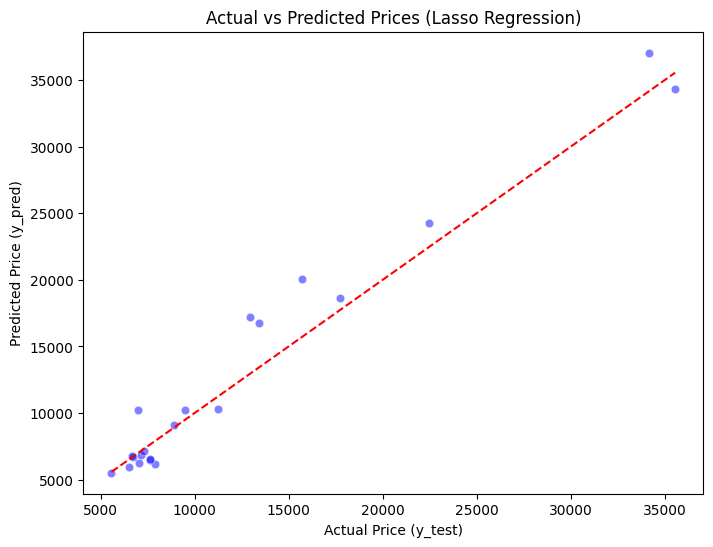

In [294]:
y_test_predict = price_predictor.predict(x_test)

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_predict, color='blue', alpha=0.5)

# Plot the ideal 1:1 line (Perfect Predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Price (y_test)")
plt.ylabel("Predicted Price (y_pred)")
plt.title("Actual vs Predicted Prices (Lasso Regression)")
plt.show()

In [295]:
r2 = r2_score(y_test, y_test_predict)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9462


An $R^2$ value of 0.9454 means that **94.54%** of the variance in the target variable is explained by the regression model.
This is a very good fit, as it indicates that the model captures most of the underlying patterns in the data.

In [296]:
mape = mean_absolute_percentage_error(y_test, y_test_predict)
print(f'MAPE: {mape * 100:.2f}%')

MAPE: 12.13%


The model's Mean Absolute Percentage Error (MAPE) is **12.30%**, which indicates that, on average, the model's predictions are off by 12.30% from the actual values. This level of error suggests that the model is performing moderately well.

As the dataset it very small this much error is resonable.

#### Saving the model

In [297]:
joblib.dump(price_predictor, 'carPricePredictor.pkl')

['carPricePredictor.pkl']

#### To load the model
```python
model = joblib.load('carPricePredictor.pkl')
```

### **Lasso Regression Model Analysis**

Our Lasso Regression model achieved an **R² score of 0.9656**, indicating a strong fit and high predictive power. Lasso’s built-in feature selection helps remove irrelevant predictors, improving interpretability. Tuning the **alpha** parameter may further enhance performance and generalization.